In [1]:
import ROOT, rootpy
import numpy as np
ROOT.gROOT.SetBatch(True)
import sys
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
ROOT.gROOT.cd()

True

In [3]:
tt1 = ROOT.TChain("tree_b")
tt2 = ROOT.TChain("tree_c")
tt3 = ROOT.TChain("tree_l")

In [4]:
tt1.AddFile("../data/jun17/ttjets.root")

1

In [5]:
tt2.AddFile("../data/jun17/ttjets.root")

1

In [6]:
tt3.AddFile("../data/jun17/ttjets.root")

1

In [7]:
ROOT.gROOT.cd()
tt1.Draw("Jet_pt:abs(Jet_eta) >> hb(100,0,2.5, 100,20,520)", "Jet_pt>20 && abs(Jet_flavour)==5", "goff")

31811790L

In [8]:
tt2.Draw("Jet_pt:abs(Jet_eta) >> hc(100,0,2.5, 100,20,520)", "Jet_pt>20 && abs(Jet_flavour)==4", "goff")

12366274L

In [9]:
tt3.Draw("Jet_pt:abs(Jet_eta) >> hl(100,0,2.5, 100,20,520)", "Jet_pt>20 && (abs(Jet_flavour)==21 || abs(Jet_flavour)<4)", "goff")

61291293L

In [10]:
hb = ROOT.gROOT.Get("hb")
hb.Scale(1.0 / hb.Integral())

In [11]:
hc = ROOT.gROOT.Get("hc")
hc.Scale(1.0 / hc.Integral())

In [12]:
hl = ROOT.gROOT.Get("hl")
hl.Scale(1.0 / hl.Integral())

In [13]:
of = ROOT.TFile("tt_weights.root", "RECREATE")
of.cd()
for h in [hb, hc, hl]:
    h = h.Clone(h.GetName())
    h.SetDirectory(of)
    h.Write()
#of.Write()
of.Close()

In [14]:
import rootpy

In [27]:
hl = rootpy.asrootpy(hl);
hb = rootpy.asrootpy(hb);
hc = rootpy.asrootpy(hc);

In [25]:
import rootpy.plotting.root2matplotlib as rplt
from matplotlib.colors import LogNorm

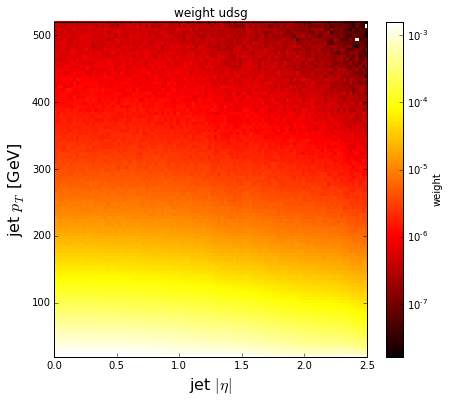

In [33]:
plt.figure(figsize=(7,6))
cb = rplt.hist2d(hl, cmap="hot", norm=LogNorm())
plt.colorbar(cb[3], label="weight")
plt.xlabel("jet $|\eta|$", fontsize=16)
plt.ylabel("jet $p_T$ [GeV]", fontsize=16)
plt.title("weight udsg")

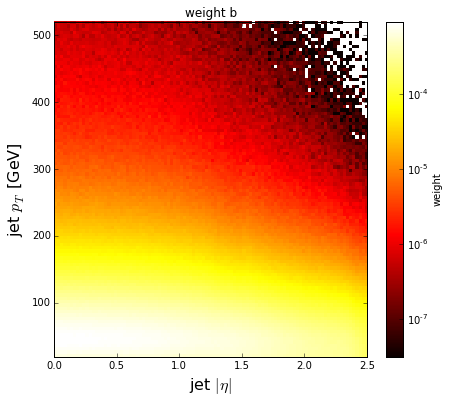

In [34]:
plt.figure(figsize=(7,6))
cb = rplt.hist2d(hb, cmap="hot", norm=LogNorm())
plt.colorbar(cb[3], label="weight")
plt.xlabel("jet $|\eta|$", fontsize=16)
plt.ylabel("jet $p_T$ [GeV]", fontsize=16)
plt.title("weight b")

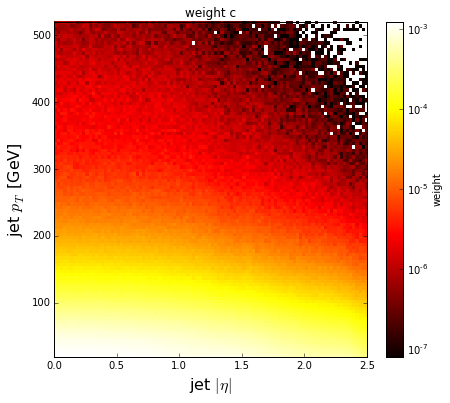

In [35]:
plt.figure(figsize=(7,6))
cb = rplt.hist2d(hc, cmap="hot", norm=LogNorm())
plt.colorbar(cb[3], label="weight")
plt.xlabel("jet $|\eta|$", fontsize=16)
plt.ylabel("jet $p_T$ [GeV]", fontsize=16)
plt.title("weight c")

In [297]:
def fit_n(n):
    hp = hl.projection_y("px", n,n)
    f = ROOT.TF1("f1","[0]*exp([1] + [4]*x + [2]*TMath::Power(x, [3]))",20,300)
    f.SetParameter(0, 0.001)
    f.SetParameter(1, 0.001)
    f.SetParameter(2, -0.001)
    f.SetParameter(3, 2.0)

    f.SetParameter(4, -0.001)
    r = hp.Fit(f, "EM0")
    #f.GetParameter(2)
    #for i in range(f.GetNpar()):
    #    print i, "%.3E" % f.GetParameter(i), "%.3E" % f.GetParError(i), "%.2f" % (100.0 * f.GetParError(i)/f.GetParameter(i))
    #xs = np.linspace(20, 400)
    #ys = [f.Eval(x) for x in xs]
    #rplt.hist(rootpy.asrootpy(hp))
#     plt.plot(xs, ys, lw=2)
#     plt.yscale("log")
#     plt.ylim(0.00001, 0.2)
    ret = np.array([[f.GetParameter(i) for i in range(5)], [f.GetParError(i) for i in range(5)]])
    return ret

In [298]:
a = np.array([fit_n(i) for i in range(100)])

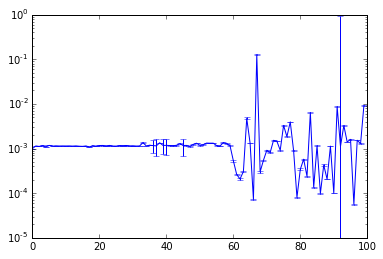

In [303]:
plt.errorbar(range(100), a[:, 0, 0], a[:, 1, 0])
plt.yscale("log")

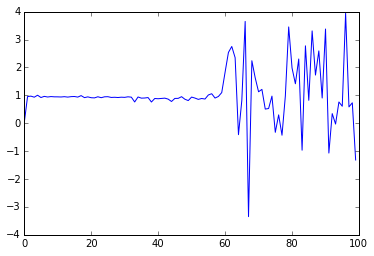

In [226]:
plt.plot(a[:, 0, 1])

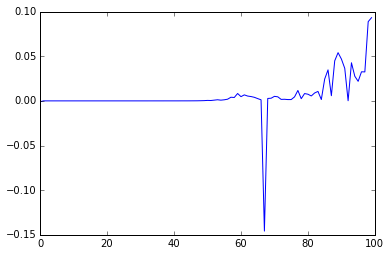

In [227]:
plt.plot(a[:, 0, 2])

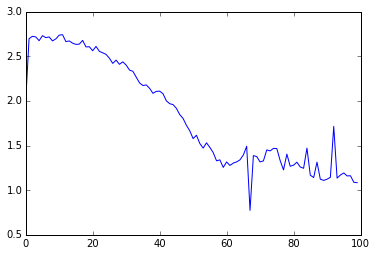

In [228]:
plt.plot(a[:, 0, 3])

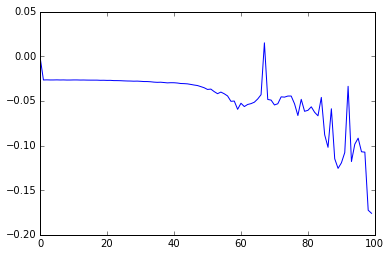

In [229]:
plt.plot(a[:, 0, 4])